In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit, KFold
import matplotlib.pyplot as plt
from scipy import sparse
from itertools import product
from time import time
import seaborn
%run Helpers.ipynb

In [2]:
n_components = [10, 20, 40, 60]
data = [X, Xhat]
metrics = ['cosine', 'minkowski']

scores = np.zeros((2, 2, 4))
times = np.zeros((2, 2, 4))

cv = 7
rs = KFold(n_splits=cv)

In [8]:
for i, j, k in product(range(len(data)), range(len(metrics)), range(len(n_components))):
    temp_score = []
    temp_times = []
    print(i,j,k)
    for train_index, test_index in rs.split(data[i]):
        #make pca
        pca = TruncatedSVD(n_components=n_components[k]).fit(data[i][train_index])
        #make and train neighbors
        nn  = NearestNeighbors(metric=metrics[j], algorithm='brute').fit(pca.transform(data[i][train_index]))
        start = time()
        neighbors = nn.kneighbors(pca.transform(data[i][test_index]), 1)
        temp_times.append(time() - start)
        #save score
        temp_score.append( (recipe_score(test_index, neighbors[1].flatten())).mean() )
        
    times[i,j,k]  = np.array(temp_times).mean()
    scores[i,j,k] = np.array(temp_score).mean()
    
np.save("results/scores_recipeNN.npy", scores)
np.save("results/times_recipeNN.npy", times)

0 0 0
0 0 1
0 0 2
0 0 3
0 1 0
0 1 1
0 1 2
0 1 3
1 0 0
1 0 1
1 0 2
1 0 3
1 1 0
1 1 1
1 1 2
1 1 3


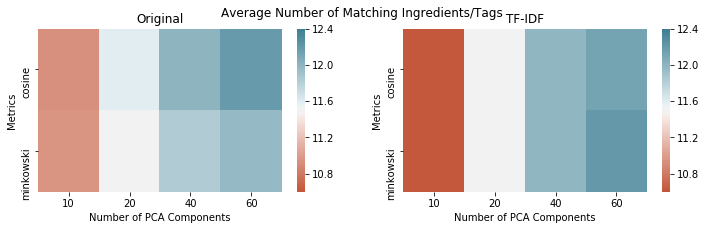

In [9]:
scores = np.load("results/scores_recipeNN.npy")

fig,ax = plt.subplots(1, 2, figsize=(12,3))
ax = ax.reshape(-1)
for i in range(len(data)):
    seaborn.heatmap(scores[i], vmin=10.6, vmax=12.4, xticklabels=n_components, yticklabels=metrics, cmap=seaborn.diverging_palette(20, 220, n=200), ax=ax[i])
    ax[i].set_ylabel('Metrics')
    ax[i].set_xlabel('Number of PCA Components')

fig.suptitle('Average Number of Matching Ingredients/Tags')
ax[0].set_title('Original')
ax[1].set_title('TF-IDF')
plt.savefig("figs/recipeNN_scores.pdf", bbox_inches="tight")
plt.show()

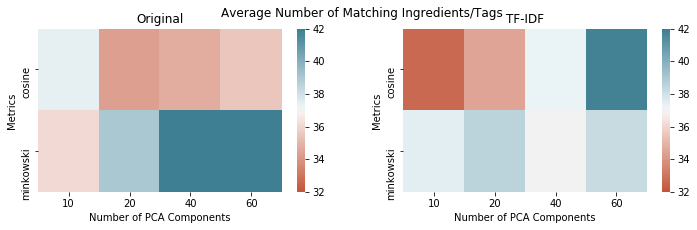

In [10]:
times = np.load("results/times_recipeNN.npy")

fig,ax = plt.subplots(1, 2, figsize=(12,3))
ax = ax.reshape(-1)
for i in range(len(data)):
    seaborn.heatmap(times[i], vmin=32, vmax=42, xticklabels=n_components, yticklabels=metrics, cmap=seaborn.diverging_palette(20, 220, n=200), ax=ax[i])
    ax[i].set_ylabel('Metrics')
    ax[i].set_xlabel('Number of PCA Components')

fig.suptitle('Average Number of Matching Ingredients/Tags')
ax[0].set_title('Original')
ax[1].set_title('TF-IDF')
plt.savefig("figs/recipeNN_times.pdf", bbox_inches="tight")
plt.show()